In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from normalizer import DataNormalizer

В данном ноутбуке обучается итоговая модель. Используется утилита DataNormalizer, что инкапсулирует пайплайн обработки данных из ноутбука `investigation.ipynb`.

In [2]:
def evaluate(model, x_test, y_test):
    preds = model.predict(x_test)
    f1 = f1_score(y_test, preds)
    print(f'f1-score: {f1:.2f}')
    conf_mat = confusion_matrix(y_test, preds)
    conf_mat = conf_mat / conf_mat.sum(axis=1, keepdims=True)
    sns.heatmap(conf_mat, annot=True)
    return conf_mat

In [3]:
features = pd.read_csv('features_train.csv')
labels = pd.read_csv('classes_train.csv').to_numpy()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(features, labels)

In [5]:
norm = DataNormalizer()

In [6]:
norm.fit(x_train)

In [7]:
x_train, x_test = norm.normalize(x_train), norm.normalize(x_test)

In [8]:
cls_weights = {
               0: 1 / np.mean(y_train == 0),
               1: 1 / np.mean(y_train == 1)
               }

In [9]:
model = SVC(class_weight=cls_weights).fit(x_train, y_train)

c:\Users\oKata\anaconda3\envs\pixel\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1-score: 0.99


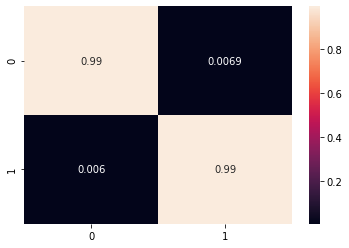

In [10]:
_ = evaluate(model, x_test, y_test)

In [11]:
from pickle import dumps

with open('model/model.pkl', 'wb') as f:
    f.write(
        dumps(
            {
                'model': model,
                'norm': norm
            }
        )
    )